# Scikit-Learn
## Don't forget to normalize your data!

In [7]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

import json

import sklearn

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
%matplotlib inline

In [3]:
sklearn.__version__

'0.18.1'

In [4]:
def chunkstring(string, length):
    "A generator which return the string, split up into fixed-width substrings of given length"
    return (string[0+i:length+i] for i in range(0, len(string), length))

def dswrite(data, recordLen, colspecs):
    """Write out the records in a text format that can be read by pandas.read_fwf()
    FIXME: somehow check whether the last record is valid
    """
    with open("/tmp/file.txt", "w") as f:
        for l in chunkstring(data, recordLen):
            print(l, file=f)

In [5]:
def bench_k_means(estimator, name, data, sample_size):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

In [6]:
def km(data_unscaled, k, labels=None):
    "data_unscaled is a 2D numpy array, one column per feature"
    np.random.seed(42)

    data = scale(data_unscaled)

    n_samples, n_features = data.shape
    labels = labels  or  range(k)

    sample_size = 300

    print("k: %d, \t n_samples %d, \t n_features %d"
          % (k, n_samples, n_features))

    print(79 * '_')
    print('% 9s' % 'init'
          '          time  inertia    homo   compl  v-meas     ARI AMI  silhouette')

    bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data, sample_size=sample_size)

# ETL bytefreqs

In [10]:
with open("/srv/bs/mirror/nasa/assignments.json", 'r') as f: j = json.loads(f.read())

In [11]:
j[0]

{'blocks': 12853.0,
 'blocksize': 404,
 'bytefreqs': [[64, 4872],
  [1, 25],
  [75, 895],
  [242, 471],
  [240, 760],
  [241, 663],
  [146, 25],
  [243, 547],
  [244, 370],
  [245, 355],
  [246, 451],
  [247, 205],
  [248, 202],
  [249, 159]],
 'charset': 'cp037',
 'left_over': 0,
 'len': 5192612,
 'name': 'spdf.sci.gsfc.nasa.gov/pub/data/ats/ats1/electron_spectrometer/6-min_avg_count_rates/DATA2_DR002945_DR002945_20080611_083040/dr002945_f00001.phys.1',
 'topbytes': ['40', '4b', 'f0', 'f1', 'f3', 'f2', 'f6', 'f4', 'f5', 'f7'],
 'upperbitchars': []}

In [14]:
bf = [r.get('bytefreqs', [])  for r in j]

In [16]:
len(bf)

5137

In [17]:
bf[0]

[[64, 4872],
 [1, 25],
 [75, 895],
 [242, 471],
 [240, 760],
 [241, 663],
 [146, 25],
 [243, 547],
 [244, 370],
 [245, 355],
 [246, 451],
 [247, 205],
 [248, 202],
 [249, 159]]

In [64]:
bfa_unscaled = np.zeros((len(bf), 256), dtype=np.float64)

In [65]:
for i, row in enumerate(bf):
    for t in row:
        bfa_unscaled[i,t[0]] = t[1]

In [66]:
bfa_unscaled[:3,:]

array([[  0.00000000e+00,   2.50000000e+01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

In [67]:
bfa = scale(bfa_unscaled)

In [68]:
bfa[:3]

array([[ -0.75252716,  -0.62514063,  -0.75530772,  -0.64838441,
         -0.64898103,  -0.57363654,  -0.51790342,  -0.61774693,
         -0.60107906,  -0.41607263,  -0.3391323 ,  -0.44030799,
         -0.39179996,  -0.51995473,  -0.47764494,  -0.45076935,
         -0.34875729,  -0.50724793,  -0.43185239,  -0.46039991,
         -0.38813836,  -0.46443042,  -0.35834098,  -0.45805209,
         -0.30030134,  -0.42274134,  -0.4156198 ,  -0.4558193 ,
         -0.39863201,  -0.444379  ,  -0.25222016,  -0.37542946,
         -0.52006144,  -0.33955513,  -0.33864631,  -0.36336268,
         -0.24684456,  -0.38974959,  -0.34161664,  -0.35716489,
         -0.31692771,  -0.35863817,  -0.32654672,  -0.35511799,
         -0.30916134,  -0.49964096,  -0.55252394,  -0.39225694,
         -0.53214601,  -0.51621961,  -0.47754624,  -0.49655083,
         -0.54269745,  -0.57296253,  -0.5389704 ,  -0.45155984,
         -0.35603743,  -0.42754253,  -0.3356609 ,  -0.34535513,
         -0.28097302,  -0.33289958,  -0.

In [69]:
k = 4

In [70]:
kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, n_jobs=-2)
kmeans.fit(bfa)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=-2, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [71]:
kmeans.cluster_centers_

array([[ 0.11087421, -0.05080348,  0.04913093, ...,  0.85576878,
         0.76730483,  0.49855584],
       [-0.71693684, -0.67530806, -0.75398507, ..., -0.41660894,
        -0.37165116, -0.35118046],
       [ 0.39918472,  0.47926646,  0.46319845, ..., -0.30141698,
        -0.27150625, -0.10441596],
       [-0.73002133, -0.68025211, -0.75530772, ..., -0.41856724,
        -0.37338536, -0.35121933]])

## Bytefreqs visualization

In [72]:
reduced_data = PCA(n_components=2).fit_transform(bfa)

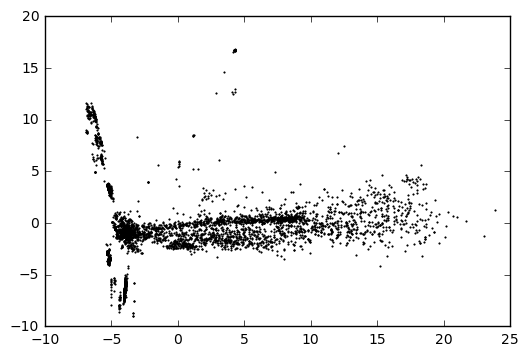

In [73]:
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

In [89]:
data = bfa #[-1000:]
k = 10

In [90]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [91]:
kmeans.cluster_centers_

array([[ -3.88445336,  -0.77017398],
       [  4.81590237,  -0.53473007],
       [ 15.51683444,   0.73626266],
       [ -4.06008665,  -6.46620622],
       [  0.76876019,  -1.00614677],
       [ -6.09853354,   9.28453385],
       [ -5.23927393,  -3.0695247 ],
       [  4.21319392,  16.09929744],
       [ -5.17670376,   3.55447611],
       [  9.07940731,   0.04559815]])

In [92]:
kmeans.verbose

0

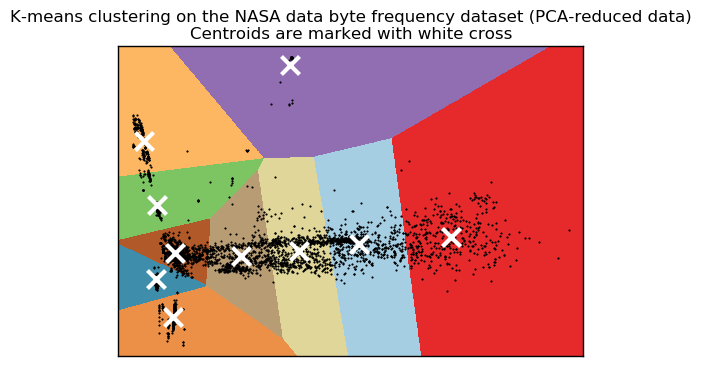

In [94]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the NASA data byte frequency dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# ETL decimal point marker detection for DR2129

with open('../dr002129_f00001.phys.1', 'rt', encoding='cp500') as f:
    d2129e = f.read()

In [70]:
len(d2129e)

3270980

In [221]:
for c in " -.0Aa": print("%s %d" % (c, ord(c)))

  32
- 45
. 46
0 48
A 65
a 97


In [222]:
d=d2129c

In [226]:
d[:,6]

array([b' ', b' ', b'.', ..., b'.', b' ', b'.'], 
      dtype='|S1')

In [ ]:
np.where()

In [237]:
cols_with_decimalpoints = [i for i,v in enumerate(col_has_decimalpoints)  if v]

In [239]:
len(cols_with_decimalpoints)

66

In [240]:
str(cols_with_decimalpoints)

'[5, 6, 7, 9, 10, 12, 13, 14, 15, 16, 19, 20, 21, 25, 29, 30, 33, 35, 36, 40, 41, 44, 45, 47, 48, 50, 51, 52, 55, 56, 60, 63, 65, 67, 69, 70, 73, 75, 79, 80, 83, 85, 89, 90, 93, 95, 99, 100, 103, 105, 106, 110, 111, 115, 116, 120, 124, 125, 126, 130, 132, 135, 136, 140, 145, 150]'

In [236]:
col_has_decimalpoints = [any(d[:,col] == b'.') for col in range(d.shape[1])]

In [244]:
d[:,col_has_decimalpoints][:5]

/home/neal/Envs/hug/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  if __name__ == '__main__':


array([[b'', b'', b'', b'', b'', b's', b's', b's', b'', b's', b's', b'',
        b's', b's', b's', b's', b's', b'', b'', b's', b's', b's', b'', b'',
        b'', b's', b'', b'', b'', b's', b's', b'', b'', b's', b'', b's',
        b's', b'', b'', b'', b's', b's', b'', b'', b's', b's', b'', b's',
        b's', b'', b's', b's', b's', b'', b'', b's', b's', b'', b'', b'',
        b's', b'', b'', b's', b'', b's', b'', b's', b'', b's', b's', b'',
        b'', b's', b'', b's', b'', b'', b'', b's', b's', b'', b'', b's',
        b'', b's', b'', b'', b'', b's', b's', b'', b'', b's', b'', b's',
        b'', b'', b'', b's', b's', b'', b'', b's', b'', b's', b's', b'',
        b'', b'', b's', b's', b'', b'', b'', b's', b's', b'', b'', b'',
        b's', b'', b'', b'', b's', b's', b's', b'', b'', b'', b's', b'',
        b's', b'', b'', b's', b's', b'', b'', b'', b's', b'', b'', b'',
        b'', b's', b'', b'', b'', b'', b's', b'', b'', b'', b'', b'', b'',
        b'', b'', b'', b'', b'', b'', b''],
 

In [123]:
d2129c = np.array(d2129e, 'c')
d2129c.shape = (-1, 164)
d2129f = d2129c.view(np.uint8).astype(np.float)

In [252]:
d2129c[1:2][:,cols_with_decimalpoints]

array([[b'.', b' ', b' ', b'5', b'.', b'3', b'.', b' ', b'2', b'.', b'.',
        b'2', b'0', b'.', b' ', b' ', b'.', b'8', b'1', b'.', b'5', b'7',
        b'.', b'0', b'.', b'2', b'.', b'8', b'0', b'.', b'.', b'2', b'0',
        b'.', b' ', b' ', b'.', b' ', b'.', b'7', b'.', b' ', b'.', b'7',
        b'.', b' ', b'.', b'0', b'.', b'3', b' ', b'.', b' ', b'.', b' ',
        b'.', b'.', b'0', b'0', b'.', b'0', b'1', b'.', b' ', b' ', b' ']], 
      dtype='|S1')

In [250]:
d2129c[1:2]

array([[b'', b's', b' ', b' ', b'1', b'.', b' ', b' ', b'1', b'5', b'.',
        b' ', b'3', b'.', b' ', b'2', b'.', b'2', b'3', b'.', b'2', b'0',
        b' ', b'-', b'1', b'.', b'3', b'5', b'7', b' ', b' ', b'6', b'9',
        b'.', b'5', b'8', b'1', b'5', b'0', b'6', b'.', b'5', b' ', b' ',
        b'7', b'.', b'4', b'0', b'.', b'4', b'2', b'.', b'8', b'0', b'1',
        b'0', b'.', b'9', b' ', b'3', b'.', b'6', b'7', b'2', b'1', b'0',
        b'0', b'.', b'0', b' ', b' ', b'2', b'0', b'.', b'9', b' ', b'-',
        b'1', b'5', b'.', b'7', b' ', b'0', b'.', b'0', b' ', b'-', b'1',
        b'5', b'.', b'7', b' ', b'0', b'.', b'0', b' ', b'2', b'8', b'3',
        b'.', b'0', b' ', b'0', b'.', b'9', b'3', b' ', b' ', b' ', b'0',
        b'.', b' ', b' ', b' ', b'0', b'.', b' ', b'4', b'9', b'8', b'.',
        b'1', b'0', b'0', b'.', b'0', b'0', b'1', b'0', b'0', b'.', b'0',
        b'0', b' ', b' ', b'1', b'.', b'4', b'8', b' ', b' ', b' ', b' ',
        b' ', b' ', b' ', b' ', b' ', b

In [136]:
t = d2129c[:5]

In [142]:
t.view('S82')[:,0]

array([ b'\x00s                 131    4                 MAD                     0             ',
       b'\x00s  1.  15. 3. 2.23.20 -1.357  69.581506.5  7.40.42.8010.9 3.672100.0  20.9 -15.7 ',
       b'\x00s  10. 3. 2.26.70 -1.577  69.605506.6  7.40.51.8010.9 3.672100.0  20.9 -10.4 0.0 ',
       b'\x00s  2.  15. 3. 2.51.10 -3.116  69.768507.5  7.41.55.5010.8 3.762100.0  20.9 -15.8 ',
       b'\x00s  10. 3. 2.54.60 -3.336  69.792507.6  7.42. 4.6010.8 3.762100.0  20.9 -10.5 0.0 '], 
      dtype='|S82')

In [141]:
t.view('S164')[:,0]

array([ b'\x00s                 131    4                 MAD                     0                                                                                     0000000000',
       b'\x00s  1.  15. 3. 2.23.20 -1.357  69.581506.5  7.40.42.8010.9 3.672100.0  20.9 -15.7 0.0 -15.7 0.0 283.0 0.93   0.   0. 498.100.00100.00  1.48                   000000',
       b'\x00s  10. 3. 2.26.70 -1.577  69.605506.6  7.40.51.8010.9 3.672100.0  20.9 -10.4 0.0 -10.4 0.0 283.0 0.93   0.   0. 498.100.00100.00  1.48448 66 66 66 66 55 78  000000',
       b'\x00s  2.  15. 3. 2.51.10 -3.116  69.768507.5  7.41.55.5010.8 3.762100.0  20.9 -15.8 0.0 -15.8 0.0 279.0 0.93   0.   0. 509.100.00100.00  1.44                   000000',
       b'\x00s  10. 3. 2.54.60 -3.336  69.792507.6  7.42. 4.6010.8 3.762100.0  20.9 -10.5 0.0 -10.5 0.0 278.0 0.93   0.   0. 509.100.00100.00  1.44455 67 67 67 67 55 79  000000'], 
      dtype='|S164')

In [132]:
charar = np.chararray((3,))

In [133]:
charar[:] = 'a'

In [134]:
charar

chararray([b'a', b'a', b'a'], 
      dtype='|S1')

In [135]:
np.core.defchararray.join('', charar)

TypeError: sequence item 0: expected str instance, int found

In [131]:
np.core.defchararray.join('', d2129c[:3])

TypeError: sequence item 0: expected str instance, int found

In [119]:
d2129c = np.array(d2129e, 'c')
d2129f = d2129c.view(np.uint8).astype(np.float)

In [122]:
d2129c[:5]

array([b'', b's', b' ', b' ', b' '], 
      dtype='|S1')

In [96]:
d2129f.shape = (-1, 164)

In [98]:
d2129f.shape

(19945, 164)

In [97]:
d2129f

array([[   0.,  115.,   32., ...,   48.,   48.,   48.],
       [   0.,  115.,   32., ...,   48.,   48.,   48.],
       [   0.,  115.,   32., ...,   48.,   48.,   48.],
       ..., 
       [   0.,  115.,   32., ...,   32.,   48.,   48.],
       [   0.,  115.,   32., ...,   32.,   48.,   48.],
       [   0.,  115.,   32., ...,   32.,   48.,   48.]])

# K-Means

In [100]:
dim = 9

In [99]:
km(d2129f, dim)

k: 9, 	 n_samples 19945, 	 n_features 164
_______________________________________________________________________________
init          time  inertia    homo   compl  v-meas     ARI AMI  silhouette


ValueError: labels_true and labels_pred must have same size, got 1797 and 19945

In [20]:
km(digits.data, 10)

k: 10, 	 n_samples 1797, 	 n_features 64
_______________________________________________________________________________
init          time  inertia    homo   compl  v-meas     ARI AMI  silhouette
k-means++   0.31s    69432   0.602   0.650   0.625   0.465   0.598    0.146


In [374]:
%%timeit
KMeans(init='k-means++', n_clusters=dim, n_init=10, n_jobs=-2).fit(d2129f)

1 loop, best of 3: 2.53 s per loop


In [102]:
fit = _

In [109]:
predicts = fit.predict(d2129f)

In [114]:
predicts[:50]

array([2, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 6, 5, 6, 5, 0, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5,
       6, 5, 6, 5], dtype=int32)

In [143]:
d2129c.view('S164')[:5]

array([[ b'\x00s                 131    4                 MAD                     0                                                                                     0000000000'],
       [ b'\x00s  1.  15. 3. 2.23.20 -1.357  69.581506.5  7.40.42.8010.9 3.672100.0  20.9 -15.7 0.0 -15.7 0.0 283.0 0.93   0.   0. 498.100.00100.00  1.48                   000000'],
       [ b'\x00s  10. 3. 2.26.70 -1.577  69.605506.6  7.40.51.8010.9 3.672100.0  20.9 -10.4 0.0 -10.4 0.0 283.0 0.93   0.   0. 498.100.00100.00  1.48448 66 66 66 66 55 78  000000'],
       [ b'\x00s  2.  15. 3. 2.51.10 -3.116  69.768507.5  7.41.55.5010.8 3.762100.0  20.9 -15.8 0.0 -15.8 0.0 279.0 0.93   0.   0. 509.100.00100.00  1.44                   000000'],
       [ b'\x00s  10. 3. 2.54.60 -3.336  69.792507.6  7.42. 4.6010.8 3.762100.0  20.9 -10.5 0.0 -10.5 0.0 278.0 0.93   0.   0. 509.100.00100.00  1.44455 67 67 67 67 55 79  000000']], 
      dtype='|S164')

If we take the positions of decimal places as a signature, there are only 6 unique signatures in dr2129: here is a count for each unique tuple of columns.  E.g. 54 records have a "." in columns 7 and 14.

If we use a more specific signature: all columns that have an unusual character or decimal point, we get 9 unique signatures.  Here we look for any character other than a digit, a minus sign and a space.

In [362]:
def dpcols(record):
    "list of columns with decimal points in this byte array"

    chd = [record[col] == b'.' for col in range(record.shape[0])]
    cwd = tuple(i for i,v in enumerate(chd)  if v)
    return cwd

def dpacols(record):
    "list of columns with decimal points or non-number-characters in this byte array"

    chd = [record[col] not in b'-0123456789 ' for col in range(record.shape[0])]
    cwd = tuple(i for i,v in enumerate(chd)  if v)
    return cwd

In [363]:
alldpacols = [dpacols(record) for record in d2129c]

In [364]:
dpacol = collections.Counter(alldpacols)

In [365]:
[(v, str(t)) for t, v in dpacol.items()]

[(883,
  '(1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150)'),
 (8557,
  '(1, 5, 10, 13, 16, 19, 25, 33, 40, 45, 48, 51, 56, 60, 67, 73, 79, 83, 89, 93, 99, 103, 110, 115, 120, 124, 130, 136)'),
 (8503,
  '(1, 6, 9, 12, 15, 21, 29, 36, 41, 44, 47, 52, 56, 63, 69, 75, 79, 85, 89, 95, 99, 106, 111, 116, 120, 126, 132)'),
 (54, '(1, 7, 14)'),
 (324, '(1,)'),
 (249, '(1, 5, 10, 15)'),
 (660,
  '(1, 3, 6, 9, 12, 15, 21, 29, 36, 41, 44, 47, 52, 56, 63, 69, 75, 79, 85, 89, 95, 99, 106, 111, 116, 120, 126, 132)'),
 (660,
  '(1, 5, 7, 10, 13, 16, 19, 25, 33, 40, 45, 48, 51, 56, 60, 67, 73, 79, 83, 89, 93, 99, 103, 110, 115, 120, 124, 130, 136)'),
 (55, '(1, 44, 45, 46)')]

In [369]:
len(dpacol)

9

In [351]:
alldpcols = [dpcols(record) for record in d2129c]

In [336]:
dct = collections.Counter(alldpcols)

In [354]:
len(dct)

6

In [348]:
[(v, str(t)) for t, v in collections.Counter(alldpcols).items()]

[(54, '(7, 14)'),
 (379, '()'),
 (9163,
  '(6, 9, 12, 15, 21, 29, 36, 41, 44, 47, 52, 56, 63, 69, 75, 79, 85, 89, 95, 99, 106, 111, 116, 120, 126, 132)'),
 (9217,
  '(5, 10, 13, 16, 19, 25, 33, 40, 45, 48, 51, 56, 60, 67, 73, 79, 83, 89, 93, 99, 103, 110, 115, 120, 124, 130, 136)'),
 (249, '(5, 10, 15)'),
 (883,
  '(5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150)')]

In [350]:
sum(dct.values())

19945

In [355]:
def summarize(cluster):
    "Show 3 records in given cluster"

    global match
    match = d2129c[predicts == cluster]

    for record in match.view('S164')[:3][:,0]:
        print("%d: %s" % (cluster, str(record[1:110])))

    # col_has_decimalpoints = [any(d[:,col] == b'.') for col in range(d.shape[1])]

    alldpcols = [dpcols(record) for record in match]
    print(len(set(alldpcols)))
    '''
    chd = [match[0,col] == b'.') for col in range(d.shape[1])]
    cwd = [i for i,v in enumerate(col_has_decimalpoints)  if v] [match[0][match[0]
    cwd = match[0][cols_with_decimalpoints].view('S66')
    '''
    for record in match[:3]:
        global lastrec
        lastrec = record
        thiscwd = record[cols_with_decimalpoints].view('S66')
        # chd = ''.join(record[cols_with_decimalpoints])
        # print(chd)
    print()

In [323]:
for cluster in [1, 5, 0, 3, 7, 6, 4, 8, 2]: summarize(cluster)

1: b's  1.  15. 3. 2.23.20 -1.357  69.581506.5  7.40.42.8010.9 3.672100.0  20.9 -15.7 0.0 -15.7 0.0 283.0 0.93   0'
1: b's  2.  15. 3. 2.51.10 -3.116  69.768507.5  7.41.55.5010.8 3.762100.0  20.9 -15.8 0.0 -15.8 0.0 279.0 0.93   0'
1: b's  3.  15. 3. 3.19.10 -4.874  69.955508.6  7.43. 8.3010.6 3.792100.0  21.1 -15.9 0.0 -15.9 0.0 275.0 0.94   0'
1

5: b's  6.  15. 3. 4.42.80-10.144  70.528512.2  7.46.49.40 9.8 3.672100.0  20.9 -16.2 0.0 -16.2 0.0 266.0 0.97   0'
5: b's  7.  15. 3. 5.10.70-11.898  70.725513.6  7.48. 4.70 9.4 3.552100.0  20.9 -16.3 0.0 -16.3 0.0 264.0 0.98   0'
5: b's  8.  15. 3. 5.38.70-13.651  70.926515.0  7.49.20.80 9.2 3.652100.0  20.6 -16.4 0.0 -16.4 0.0 263.0 1.00   0'
1

0: b's C10. 3. 8.29.70-24.356  72.282525.2  7.57.37.20 7.8 3.252100.0  20.9  21.7 4.6  20.9 4.9 261.0 1.07   0. 43'
0: b's C10. 3.15.56.40-51.842  78.597558.8  8.30.19.70 6.5 3.022100.0  21.1  21.2 4.7  20.4 4.8 282.0 1.27   0. 69'
0: b's C10. 3.23.23.10-76.574 110.286591.4 10.44.31.70 5.8 4.69210

In [307]:
match[0].shape

(164,)

In [376]:
len(match)

466

In [377]:
constant_cols = np.all(match == match[0,:], axis = 0)

In [380]:
match[0][constant_cols].shape

(133,)

In [306]:
match

array([[b'', b's', b' ', ..., b'0', b'0', b'0'],
       [b'', b's', b' ', ..., b' ', b'0', b'0'],
       [b'', b's', b' ', ..., b' ', b'0', b'0'],
       ..., 
       [b'', b's', b' ', ..., b' ', b'0', b'0'],
       [b'', b's', b' ', ..., b' ', b'0', b'0'],
       [b'', b's', b' ', ..., b' ', b'0', b'0']], 
      dtype='|S1')

In [ ]:
[match[0,col] == b'.') for col in range(d.shape[1])]

In [297]:
len(match[1][cols_with_decimalpoints])

66

In [301]:
match[1].view('S164')

array([ b'\x00s  2.  15. 3. 2.51.10 -3.116  69.768507.5  7.41.55.5010.8 3.762100.0  20.9 -15.8 0.0 -15.8 0.0 279.0 0.93   0.   0. 509.100.00100.00  1.44                   000000'], 
      dtype='|S164')

In [302]:
match[1]

array([b'', b's', b' ', b' ', b'2', b'.', b' ', b' ', b'1', b'5', b'.',
       b' ', b'3', b'.', b' ', b'2', b'.', b'5', b'1', b'.', b'1', b'0',
       b' ', b'-', b'3', b'.', b'1', b'1', b'6', b' ', b' ', b'6', b'9',
       b'.', b'7', b'6', b'8', b'5', b'0', b'7', b'.', b'5', b' ', b' ',
       b'7', b'.', b'4', b'1', b'.', b'5', b'5', b'.', b'5', b'0', b'1',
       b'0', b'.', b'8', b' ', b'3', b'.', b'7', b'6', b'2', b'1', b'0',
       b'0', b'.', b'0', b' ', b' ', b'2', b'0', b'.', b'9', b' ', b'-',
       b'1', b'5', b'.', b'8', b' ', b'0', b'.', b'0', b' ', b'-', b'1',
       b'5', b'.', b'8', b' ', b'0', b'.', b'0', b' ', b'2', b'7', b'9',
       b'.', b'0', b' ', b'0', b'.', b'9', b'3', b' ', b' ', b' ', b'0',
       b'.', b' ', b' ', b' ', b'0', b'.', b' ', b'5', b'0', b'9', b'.',
       b'1', b'0', b'0', b'.', b'0', b'0', b'1', b'0', b'0', b'.', b'0',
       b'0', b' ', b' ', b'1', b'.', b'4', b'4', b' ', b' ', b' ', b' ',
       b' ', b' ', b' ', b' ', b' ', b' ', b' ', b' 

In [303]:
match[1][cols_with_decimalpoints].view('S66')

array([b'.  5.3. 2..10.  .68.57.1.5.50..20.  . .8. .8. .0.3 . . ..00.01.   '], 
      dtype='|S66')

In [288]:
np.core.defchararray.join('', match[1][cols_with_decimalpoints])

TypeError: sequence item 0: expected str instance, int found

In [290]:
np.core.defchararray.join('', charar)

TypeError: sequence item 0: expected str instance, int found

In [215]:
for fit in [1, 5, 0, 3, 7, 6, 4, 8, 2]: summarize(fit)

1: b's  1.  15. 3. 2.23.20 -1.357  69.581506.5  7.40.42.8010.9 3.672100.0  20.9 -15.7 0.0 -15.7 0.0 283.0 0.93   0'
1: b's  2.  15. 3. 2.51.10 -3.116  69.768507.5  7.41.55.5010.8 3.762100.0  20.9 -15.8 0.0 -15.8 0.0 279.0 0.93   0'
1: b's  3.  15. 3. 3.19.10 -4.874  69.955508.6  7.43. 8.3010.6 3.792100.0  21.1 -15.9 0.0 -15.9 0.0 275.0 0.94   0'

5: b's  6.  15. 3. 4.42.80-10.144  70.528512.2  7.46.49.40 9.8 3.672100.0  20.9 -16.2 0.0 -16.2 0.0 266.0 0.97   0'
5: b's  7.  15. 3. 5.10.70-11.898  70.725513.6  7.48. 4.70 9.4 3.552100.0  20.9 -16.3 0.0 -16.3 0.0 264.0 0.98   0'
5: b's  8.  15. 3. 5.38.70-13.651  70.926515.0  7.49.20.80 9.2 3.652100.0  20.6 -16.4 0.0 -16.4 0.0 263.0 1.00   0'

0: b's C10. 3. 8.29.70-24.356  72.282525.2  7.57.37.20 7.8 3.252100.0  20.9  21.7 4.6  20.9 4.9 261.0 1.07   0. 43'
0: b's C10. 3.15.56.40-51.842  78.597558.8  8.30.19.70 6.5 3.022100.0  21.1  21.2 4.7  20.4 4.8 282.0 1.27   0. 69'
0: b's C10. 3.23.23.10-76.574 110.286591.4 10.44.31.70 5.8 4.692100.0 

In [152]:
d2129c[predicts == 8].view('S164')[:5]

array([[ b'\x00s 167 1 187 4   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0          00'],
       [ b'\x00s   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0          00'],
       [ b'\x00s 122 1 136 4 140 1 143 4 172 1 192 4   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0          00'],
       [ b'\x00s   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0          00'],
       [ b'\x00s 145 1 147 4 156 1 173 4   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0   0 0          00']], 
      dtype='|S164')

In [117]:
d2129e

'\x00s                 131    4                 MAD                     0                                                                                     0000000000\x00s  1.  15. 3. 2.23.20 -1.357  69.581506.5  7.40.42.8010.9 3.672100.0  20.9 -15.7 0.0 -15.7 0.0 283.0 0.93   0.   0. 498.100.00100.00  1.48                   000000\x00s  10. 3. 2.26.70 -1.577  69.605506.6  7.40.51.8010.9 3.672100.0  20.9 -10.4 0.0 -10.4 0.0 283.0 0.93   0.   0. 498.100.00100.00  1.48448 66 66 66 66 55 78  000000\x00s  2.  15. 3. 2.51.10 -3.116  69.768507.5  7.41.55.5010.8 3.762100.0  20.9 -15.8 0.0 -15.8 0.0 279.0 0.93   0.   0. 509.100.00100.00  1.44                   000000\x00s  10. 3. 2.54.60 -3.336  69.792507.6  7.42. 4.6010.8 3.762100.0  20.9 -10.5 0.0 -10.5 0.0 278.0 0.93   0.   0. 509.100.00100.00  1.44455 67 67 67 67 55 79  000000\x00s  3.  15. 3. 3.19.10 -4.874  69.955508.6  7.43. 8.3010.6 3.792100.0  21.1 -15.9 0.0 -15.9 0.0 275.0 0.94   0.   0. 532.100.00100.00  1.37                   000

In [116]:
d2129e[predicts == 1][:5]

TypeError: only integer arrays with one element can be converted to an index

In [108]:
import collections


In [110]:
collections.Counter(predicts)

Counter({0: 577,
         1: 1363,
         2: 466,
         3: 3830,
         4: 883,
         5: 7854,
         6: 3447,
         7: 1309,
         8: 216})

# Visualize

In [111]:
reduced_data = PCA(n_components=2).fit_transform(d2129f)

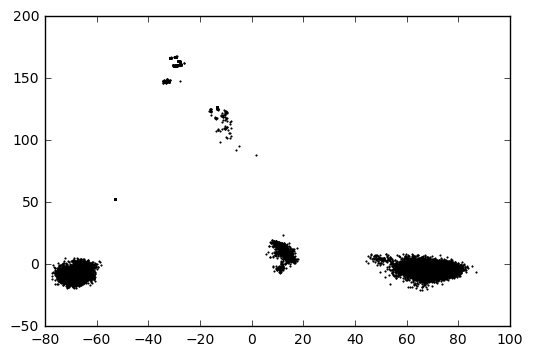

In [217]:
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

In [ ]:
data = d2129f
k = 9

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

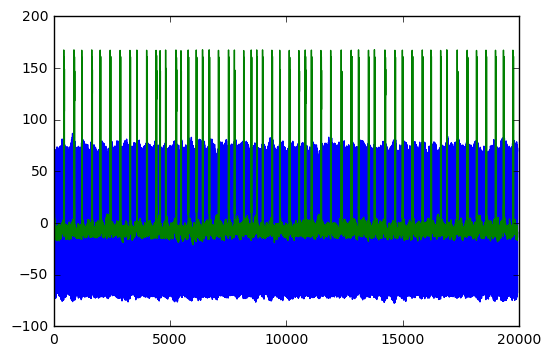

In [112]:
plt.plot(reduced_data)

In [216]:
reduced_data

array([[ -27.81681442,  148.19378032],
       [ -65.40784386,   -2.23664378],
       [  53.01696814,    3.58937344],
       ..., 
       [  72.72337726,   -8.38073736],
       [ -66.90384235,   -9.91014531],
       [  69.97127292,   -9.36810513]])

# MNIST

In [11]:
digits['data']

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [16]:
# k-means on MNIST
np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(79 * '_')
print('% 9s' % 'init'
      '          time  inertia    homo   compl  v-meas     ARI AMI  silhouette')

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(79 * '_')

n_digits: 10, 	 n_samples 1797, 	 n_features 64
_______________________________________________________________________________
init          time  inertia    homo   compl  v-meas     ARI AMI  silhouette
k-means++   0.28s    69432   0.602   0.650   0.625   0.465   0.598    0.146
   random   0.20s    69694   0.669   0.710   0.689   0.553   0.666    0.147
PCA-based   0.04s    70804   0.671   0.698   0.684   0.561   0.668    0.118
_______________________________________________________________________________


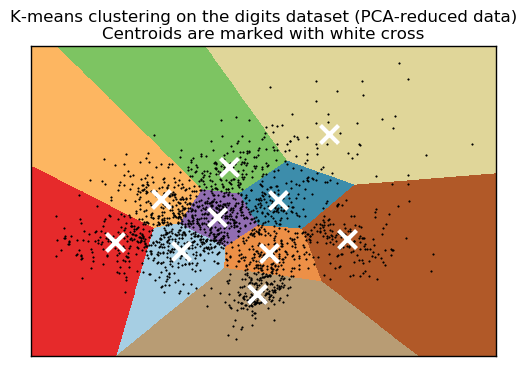

In [7]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()